In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
data = "https://raw.githubusercontent.com/YemaneZewdu/ML-Zoomcamp/main/chapter-3-churn-prediction/ch-3-data.csv"

In [9]:
# ! is for notifying the command is a shell command and $ is used to refer to 
!wget $data -O ch-3-data.csv

--2021-09-29 13:46:01--  https://raw.githubusercontent.com/YemaneZewdu/ML-Zoomcamp/main/chapter-3-churn-prediction/ch-3-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘ch-3-data.csv’

ch-3-data.csv       100%[===================>] 947.71K  4.37MB/s    in 0.2s    

2021-09-29 13:46:01 (4.37 MB/s) - ‘ch-3-data.csv’ saved [970457/970457]



In [156]:
df = pd.read_csv('ch-3-data.csv')
len(df)

7043

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# to check all the columns, we can transpose the columns to be a row, similar to Transpose in Lin Alg
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# TotalCharges has a mixed data so convert it to numbers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [16]:
# we need numbers not yes/no 
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


### Setting up the validation framework

In [157]:
# we will use a library to divide our data into three instead of the manual way
from sklearn.model_selection import train_test_split

In [158]:
# our data set test_size=0.2,
# it splits the data into two, 80 % & 20 %
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [159]:
len(df_train_full),len(df_test)

(5634, 1409)

In [160]:
# get the other 20% from the 80 % remaining,which will be 2/8 -> 1/4
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [161]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

AttributeError: 'DataFrame' object has no attribute 'churn'

In [25]:
del df_train['churn']
del df_val['churn']

### Exploratory data analysis

In [26]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
# counting occurance of a value
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [28]:
# this is the churn rate, the mean usage is described in the video
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [29]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [30]:
#selecting a subset
# num of unique values 
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate & risk ratio

In [31]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [32]:
# risk ratio calculation
female_mean / global_mean

1.0253955354648652

In [33]:
male_mean / global_mean

0.9749802969838747

In [34]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [35]:
partner_yes / global_mean

0.7594724924338315

In [36]:
partner_no / global_mean

1.2216593879412643

In [48]:
# these show us partner variable is more important in the prediction than the gender variable
# difference
# global - group: if  < 0, more likely to churn
#                 if > 0, less likely to churn
# Risk ratio
# risk = group / global: if < 1 less likely to churn
#                         if > 1 more likely to church

# we see the variable's importance with the risk ratio

In [40]:

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [41]:
from IPython.display import display

In [42]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [47]:
# changing a sql to python code
# this let us check the risk and which variable is important
# for example contract vs streaming 
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information
Mutul information - concept from info theory, tells us how much we can learn about one variable if we know the value of another

In [45]:
from sklearn.metrics import mutual_info_score

In [50]:
mutual_info_score(df_train_full.churn, df_train_full.contract)

0.0983203874041556

In [51]:
# we can see that gender isn't an important variable 
# but contract is and tells us a customer can be highly likely to churn, eg: monthly contract customer
mutual_info_score(df_train_full.gender, df_train_full.churn)

0.0001174846211139946

In [52]:
# calculate and sort by the most important 
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


## 3.7 Feature importance: Correlation
How about numerical columns?

In [54]:
# correlation -> the degree of dependency b/n two varibales
# -1 <= r <= 1, can be the value. More info on google ;) 

df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')
#when tenure increase (customer stays with us more) the less likely they churn

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [55]:
# churn rate for people that are with us for 2 month or less
df_train_full[df_train_full.tenure <=2].churn.mean()

0.5953420669577875

In [56]:
# churn rate for people that are with us for 2 month or more
df_train_full[df_train_full.tenure >=2].churn.mean()

0.23594631394670298

In [57]:
# churn rate for people that are with us for more than one year
# the more they stay the less the leave
df_train_full[df_train_full.tenure >12].churn.mean()

0.17634908339788277

In [59]:
# churn rate for people that pay less
# according to this, the less they pay the more they will leave
df_train_full[df_train_full.monthlycharges <= 20].churn.mean() 

0.08795411089866156

In [61]:
# in between 20 & 50
df_train_full[(df_train_full.monthlycharges > 20) & (df_train_full.monthlycharges < 50)].churn.mean() 

0.1836890243902439

In [64]:
df_train_full[df_train_full.monthlycharges > 100].churn.mean() 

0.29395604395604397

In [65]:
df_train_full.groupby(by='churn')[numerical].mean() 

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


## One-hot encoding
Use Scikit-Learn to encode categorical features

In [81]:
# one hot encoding came from electronics. When a current is flowing through them they get hot
from sklearn.feature_extraction import DictVectorizer
# orient='records' will make each row a dict instead of the column default
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]


{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [82]:
# training our DictVectorizer
# we change a dict to vector, the name came from that
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [83]:
X_train = dv.transform(train_dict)

In [84]:
dv.get_feature_names()
# it created columns, one for each
# the 1's are active in the column

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [85]:
X_train.shape

(3774, 45)

In [86]:
dv.transform(train_dict)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 6.04590e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.00000e+01, 6.02900e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.60000e+01, 2.06515e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 2.83000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.30000e+01, 4.70600e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.40000e+01, 5.32725e+03]])

In [87]:
# another way of doing it, getting val_dicts in a shorter syntax

val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [88]:
X_val = dv.transform(val_dicts)

## Training logistic regression
- Binary classification
- Linear vs logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [90]:
# y element of {0,1} 0 is negative or no churn and 1 is churn

In [91]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [95]:
z = np.linspace(-7, 7, 51)

In [96]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

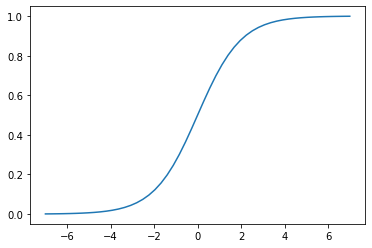

In [97]:
plt.plot(z,sigmoid(z))

In [98]:
def logistic_regression(xi):
    score = 0
    
    for j in range(len(w)):
        score += xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with scikit-learn
- Apply it to the validation dataset
- Calculate the accuracy

In [99]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/yemanezewdu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
model.intercept_[0]

-0.10736107805929992

In [105]:
model.coef_[0].round(3)

array([ 0.274, -0.131, -0.25 ,  0.055, -0.162,  0.113, -0.097, -0.122,
       -0.026, -0.08 , -0.261,  0.252, -0.097,  0.001, -0.191,  0.049,
        0.035,  0.129, -0.097, -0.139,  0.29 , -0.097, -0.3  , -0.255,
        0.149, -0.029, -0.077, -0.06 , -0.123,  0.262, -0.186,  0.049,
       -0.156,  0.203, -0.072, -0.097,  0.063, -0.074, -0.097,  0.064,
        0.27 , -0.097, -0.28 , -0.071,  0.   ])

In [107]:
# this is called hard prediction
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
# this is called soft prediction
# there are two columns they refer to the probability of being negative and +ve
# so no churn vs churn
model.predict_proba(X_train)

array([[0.98277311, 0.01722689],
       [0.69003897, 0.30996103],
       [0.89426249, 0.10573751],
       ...,
       [0.85910727, 0.14089273],
       [0.89798626, 0.10201374],
       [0.92583241, 0.07416759]])

In [111]:
# we are interested on the second column
y_pred = model.predict_proba(X_val)[:,1]

In [113]:
# True - the customer is churning
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

In [114]:
churn_decision = (y_pred >= 0.5)

In [115]:
# selecting all the customers that are likely to churn
df_val[churn_decision].customerid

155     6551-gnydg
3360    0689-nkylf
6625    3398-fshon
1384    4704-eryfc
5098    8258-gstjk
           ...    
922     4301-vvzka
3551    7594-rqhxr
6467    9494-mrnyx
1354    9415-dpews
302     8266-vbfql
Name: customerid, Length: 449, dtype: object

In [116]:
# check how accurate the predictions are
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 0])

In [117]:
# 79 % accuracy
(y_val == churn_decision).mean()

0.7973118279569893

In [120]:
# doing it another way
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred["correct"] = df_pred["prediction"] == df_pred['actual']

In [121]:
df_pred

,probability,prediction,actual,correct
0,0.196204,0,0,True
1,0.215978,0,1,False
2,0.306318,0,0,True
3,0.340265,0,1,False
4,0.083332,0,0,True
...,...,...,...,...
1855,0.278742,0,0,True
1856,0.306735,0,0,True
1857,0.056479,0,0,True
1858,0.598717,1,0,False


In [122]:
# false changes to 0 and true turns into 1 then the mean is calculated, 
# i.e we don't need to worry changing them to int vals
df_pred["correct"].mean()

0.7973118279569893

## Model interpretation
- Look at the coeffcients
- Train a smaller model with fewer features

In [124]:
# zip
a = [1, 2, 3]
b = "abc"
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c'}

In [125]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))
# weight of each variable

{'contract=month-to-month': 0.274,
 'contract=one_year': -0.131,
 'contract=two_year': -0.25,
 'dependents=no': 0.055,
 'dependents=yes': -0.162,
 'deviceprotection=no': 0.113,
 'deviceprotection=no_internet_service': -0.097,
 'deviceprotection=yes': -0.122,
 'gender=female': -0.026,
 'gender=male': -0.08,
 'internetservice=dsl': -0.261,
 'internetservice=fiber_optic': 0.252,
 'internetservice=no': -0.097,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.191,
 'multiplelines=no_phone_service': 0.049,
 'multiplelines=yes': 0.035,
 'onlinebackup=no': 0.129,
 'onlinebackup=no_internet_service': -0.097,
 'onlinebackup=yes': -0.139,
 'onlinesecurity=no': 0.29,
 'onlinesecurity=no_internet_service': -0.097,
 'onlinesecurity=yes': -0.3,
 'paperlessbilling=no': -0.255,
 'paperlessbilling=yes': 0.149,
 'partner=no': -0.029,
 'partner=yes': -0.077,
 'paymentmethod=bank_transfer_(automatic)': -0.06,
 'paymentmethod=credit_card_(automatic)': -0.123,
 'paymentmethod=electronic_check': 0.262,
 'pay

In [128]:
# train a smaller model
subset = ['contract', 'tenure', 'monthlycharges']
train_dict_small = df_train[subset].to_dict(orient='records')
val_dict_small = df_val[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)


dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [129]:

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [131]:
w0 = model_small.intercept_[0]

In [132]:
w = model_small.coef_[0]
w.round(3)

array([ 0.354, -0.601, -1.624,  0.028, -0.037])

In [133]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.354,
 'contract=one_year': -0.601,
 'contract=two_year': -1.624,
 'monthlycharges': 0.028,
 'tenure': -0.037}

## 3.2 Using the model

In [134]:
dicts_full_train = df_train_full[categorical + numerical].to_dict(orient='recorrds')

/Users/yemanezewdu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [135]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [136]:
y_full_train = df_train_full.churn.values

In [138]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [142]:
dicts_test = df_test[categorical + numerical].to_dict(orient='recorrds')

In [143]:
X_test = dv.fit_transform(dicts_test)

In [144]:
y_pred = model.predict_proba(X_test)

In [146]:
churn_decision = (y_pred >= 0.5)

In [149]:
# wrong
(churn_decision == y_pred).mean()

0.0

In [151]:
# randomly picking
customer = dicts_test[10]

In [152]:
# using the model
X_small = dv.transform([customer])

In [153]:
# the model is telling us, this customer won't churn
model.predict_proba(X_small)[0,1]

0.40568109778089384

In [154]:
# model has predicted correctly
y_pred[10]

array([0.5943189, 0.4056811])